In [35]:
import pandas as pd
import os
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
from ML_package.base_controller import ML_Base_Controller
base_controller = ML_Base_Controller()

2025-06-06 23:31:23,053 - INFO - ML_Base_Controller initialized.


In [37]:


# Load dataset
data = load_wine()

print(data)

X = data.data # Features
y = data.target # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print in percentage with 2 decimal places
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]], shape=(178, 13)), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

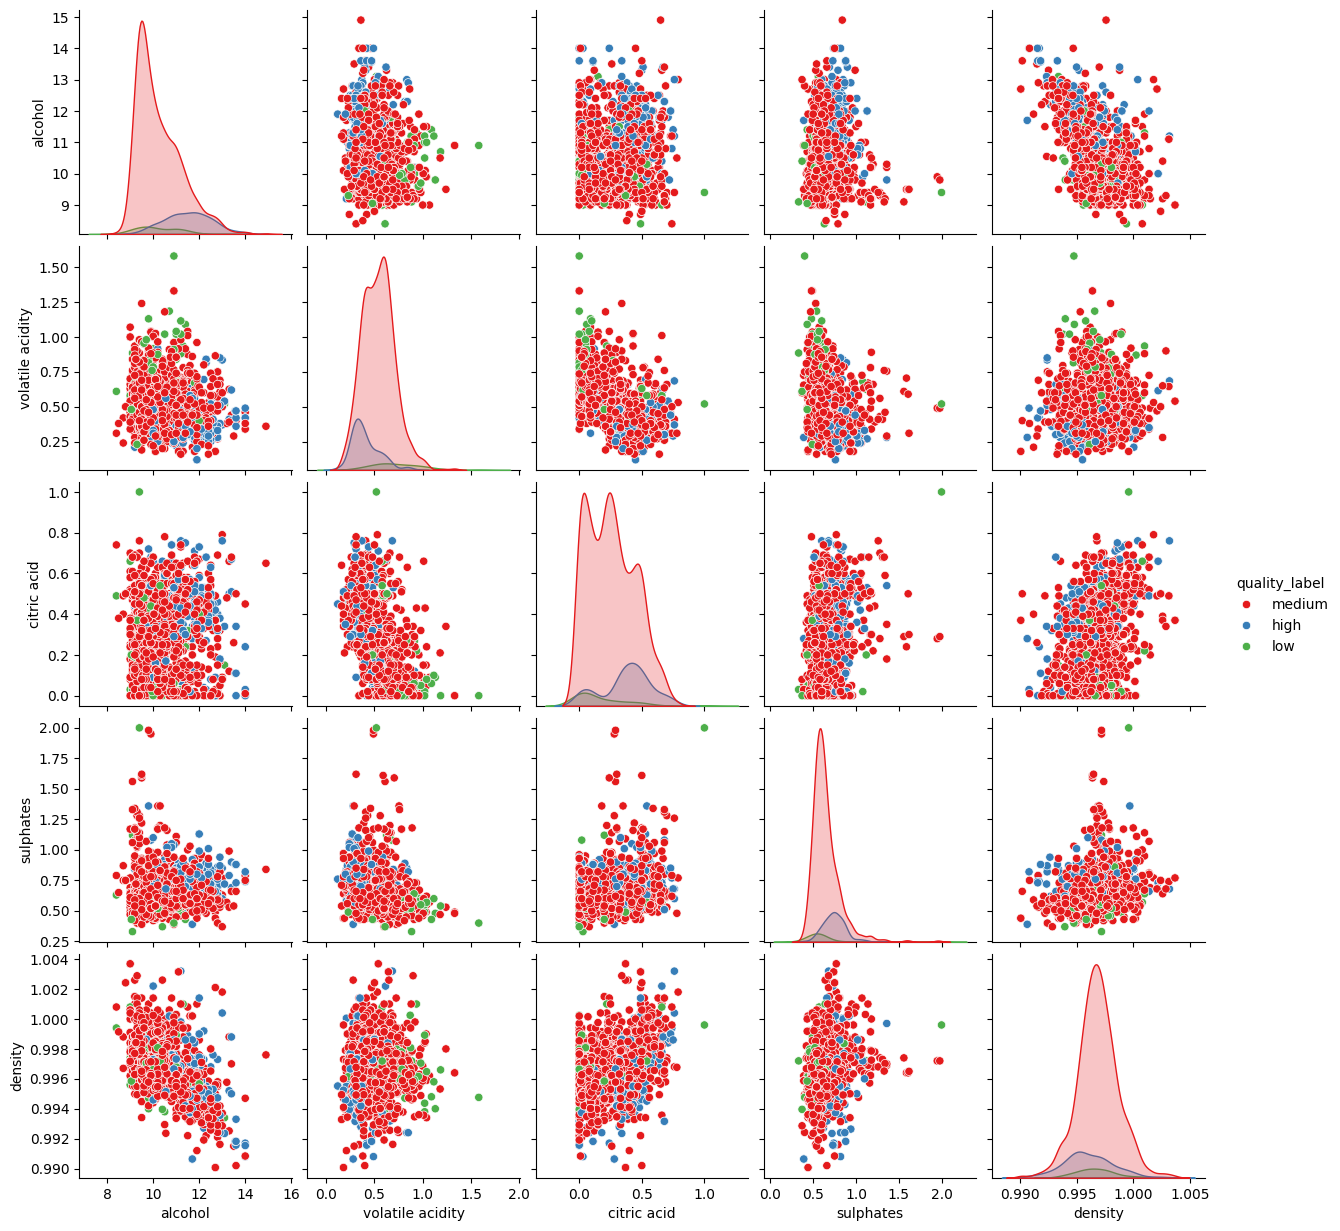

<Figure size 1000x600 with 0 Axes>

In [53]:
# Pick top features for visualization
selected_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'density']
sns.pairplot(
    data[selected_features + ["quality_label"]],
    hue="quality_label",
    palette="Set1",
    diag_kind="kde",
)
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()
# plt.suptitle("Wine Quality Classification by Features", y=1.02)

In [38]:
data = pd.read_csv(os.path.join('D:\Code for tutorials\Machine Learning\datasets\wine+quality\winequality-red.csv'),sep=';')

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [39]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [40]:
data['quality_label'] = data['quality'].apply(lambda x: 'low' if x <=4 else 'medium' if x>=5 and x<=6   else 'high')
data['quality_label'].value_counts()

quality_label
medium    1319
high       217
low         63
Name: count, dtype: int64

In [41]:
quality_map = {'low': 0, 'medium': 1, 'high': 2}
data['quality_encoded'] = data['quality_label'].map(quality_map)
data['quality_encoded'].value_counts()

quality_encoded
1    1319
2     217
0      63
Name: count, dtype: int64

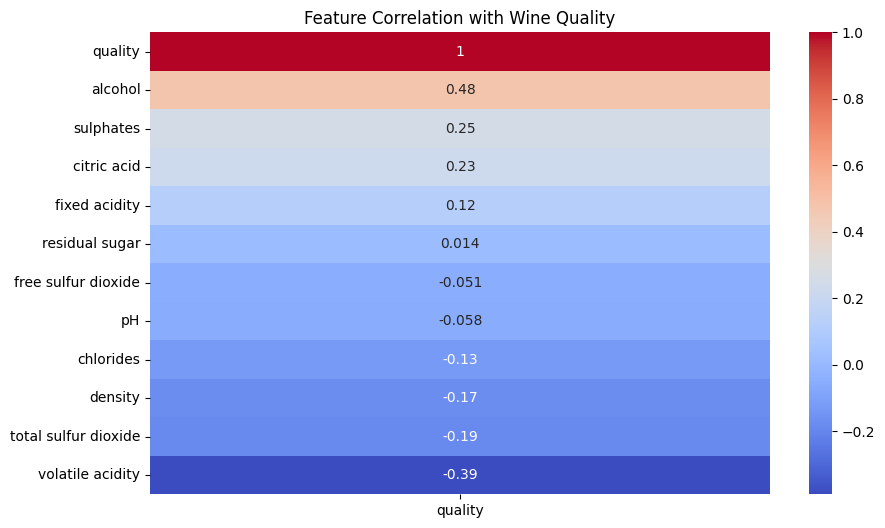

In [42]:
feature_correelation = data.drop(['quality_encoded'], axis=1)
# Include the target in the correlation matrix
corr = feature_correelation.corr(numeric_only=True)

# Visualize correlation with target
plt.figure(figsize=(10, 6))
sns.heatmap(corr[['quality']].sort_values(by='quality', ascending=False), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Wine Quality")
plt.show()

In [43]:
# # data
# base_controller.feature_impact(data=data,label='quality')

In [44]:
X   =   data.drop(['quality','quality_label','quality_encoded'],axis=1)
y   =   data['quality_encoded']  # for classification
y_reg = data['quality']  

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Random Forest Regressor
_, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [47]:
clf = RandomForestClassifier(random_state=42)
reg = RandomForestRegressor(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred_class = clf.predict(X_test_scaled)
reg.fit(X_train_scaled, y_train)
y_pred_reg = reg.predict(X_test_scaled)
print("Classification Accuracy:", round(accuracy_score(y_test, y_pred_class)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))

# y_pred_class,clf,accuracy=base_controller.fit_model(RandomForestClassifier(random_state=42),X_train_scaled,y_train,X_test_scaled,y_test)

# y_pred_reg,reg,accuracy=base_controller.fit_model(RandomForestRegressor(random_state=42),X_train_scaled,y_train,X_test_scaled,y_test)

Classification Accuracy: 86.88 %

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.89      0.96      0.92       262
           2       0.71      0.57      0.64        47

    accuracy                           0.87       320
   macro avg       0.53      0.51      0.52       320
weighted avg       0.83      0.87      0.85       320



d:\Code for tutorials\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Code for tutorials\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Code for tutorials\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


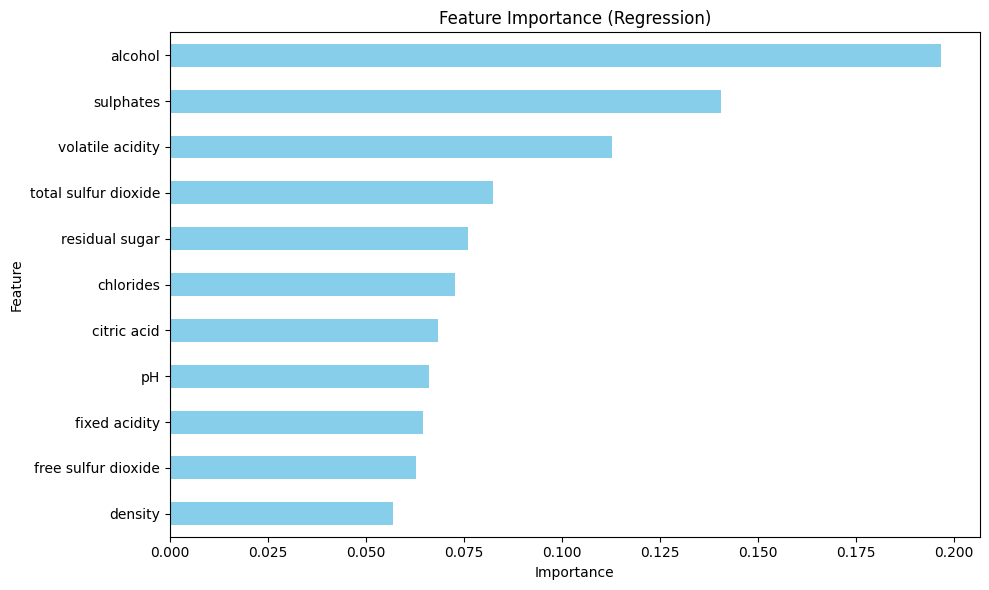

In [48]:
# Get feature importances from the regressor
importances = reg.feature_importances_
feature_names = X.columns

# Create a pandas Series for easy visualization
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh', color='skyblue')
plt.title("Feature Importance (Regression)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

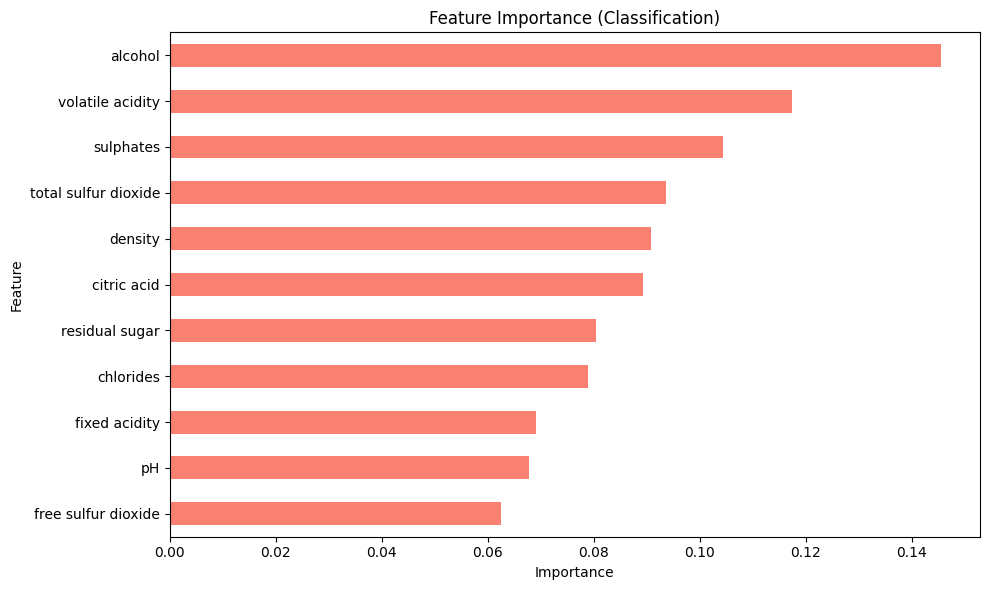

In [49]:
importances = clf.feature_importances_
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh', color='salmon')
plt.title("Feature Importance (Classification)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
